# Title

![housing](housing.jpg)

## Introduction
This data set describes the sale of individual residential property in Ames, Iowa from 2006 to 2010


## Data Dictionary
The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. [Here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) is a txt file. containing information on variables involved. 

### Resources
Data Docmentary can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
Data can also be downloaded from [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
For in detail information, click [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)

## Goal
In this project, we'll build a Linear Regression model and exploring ways to improve it by 
- Determining what features of the total 79 available are that best can be used as a predictor estimate for house sale price hence creating the best model based on linear regression for making the best posible accurate predictions for house prices.
- Determining how good the predictor equation is as a fit through root mean square error.
---

Lets import the necessary tools and libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# Display Settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

---

## Load Dataset

In [3]:
data = pd.read_table('AmesHousing.tsv', delimiter="\t")

In [4]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [54]:
data['SalePrice'].tolist()

[215000,
 105000,
 172000,
 244000,
 189900,
 195500,
 213500,
 191500,
 236500,
 189000,
 175900,
 185000,
 180400,
 171500,
 212000,
 538000,
 164000,
 394432,
 141000,
 210000,
 190000,
 170000,
 216000,
 149000,
 149900,
 142000,
 126000,
 115000,
 184000,
 96000,
 105500,
 88000,
 127500,
 149900,
 120000,
 146000,
 376162,
 306000,
 395192,
 290941,
 220000,
 275000,
 259000,
 214000,
 611657,
 224000,
 500000,
 320000,
 319900,
 205000,
 175500,
 199500,
 160000,
 192000,
 184500,
 216500,
 185088,
 180000,
 222500,
 333168,
 355000,
 260400,
 325000,
 290000,
 221000,
 410000,
 221500,
 204500,
 215200,
 262500,
 254900,
 271500,
 233000,
 181000,
 205000,
 143000,
 189000,
 99500,
 125000,
 194500,
 152000,
 171000,
 67500,
 112000,
 148000,
 138500,
 122000,
 133000,
 127000,
 169000,
 190000,
 362500,
 285000,
 260000,
 190000,
 155000,
 151000,
 149500,
 152000,
 222000,
 177500,
 177000,
 155000,
 147110,
 267916,
 254000,
 155000,
 206000,
 130500,
 230000,
 218500,
 2435

In [6]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Lets start by setting up a pipeline of functions that will let us quickly iterate on different models 

---

## Setting up a Pipeline of functions
Functions that transform features, select features and train-and-test features
![pipeline](my_pipeline.PNG)

We will build our functions and make the pipeline gradually and will improve in rounds. 
So Lets begin with the round 1, where we are just writing up minimal code. As mentioned, We will keep improving on them through out this project.

## Round 1

In [58]:
# For now, just return DataFrame
def transform_features(data):
    '''
    under developement
    '''
    return data

In [59]:
# For now, it just returns the DataFrame's two columns
def select_features(data):
    '''
    under developement
    '''
    return data[['Gr Liv Area', 'SalePrice']]

In [60]:
def train_and_test(data):
    '''
    under developement
    '''
    train = data.iloc[:1460]
    test = data.iloc[1460:]
    
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    target = 'SalePrice'
    features = numeric_train.columns.drop(target)
    
    lr = LinearRegression()
    lr.fit(train[features], train[target])
    
    predictions = lr.predict(test[features])
    
    mse = mean_squared_error(test[target], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [61]:
# Features Transformation
round1_transformed_data = transform_features(data)

# Features Selection
round1_selected_data = select_features(round1_transformed_data)

# Training and Testing
round1_rmse_data = train_and_test(round1_selected_data)

print('So in this first and lazy attempt, we have got an RMSE of', round1_rmse_data)

So in this first and lazy attempt, we have got an RMSE of 57088.25161263909


Let's now start removing features with missing values, diving deeper into potential categorical features, transforming text and numerical columns

---

## Round 2
Lets update the `transform_features()` function to achieve following goals
1. remove the features we don't want to use in the model.
    - based on the number of missing values
    - could cause Data Leakage


2. transform features into the proper format like
    - numerical to categorical 
    - scaling numerical
    - filling in missing values 
    - etc


3. Create new features by combining existing features


#### Lets explore the data and look for possible manuevering 

In [11]:
data.select_dtypes(include=['integer', 'float']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Overall Qual     2930 non-null   int64  
 6   Overall Cond     2930 non-null   int64  
 7   Year Built       2930 non-null   int64  
 8   Year Remod/Add   2930 non-null   int64  
 9   Mas Vnr Area     2907 non-null   float64
 10  BsmtFin SF 1     2929 non-null   float64
 11  BsmtFin SF 2     2929 non-null   float64
 12  Bsmt Unf SF      2929 non-null   float64
 13  Total Bsmt SF    2929 non-null   float64
 14  1st Flr SF       2930 non-null   int64  
 15  2nd Flr SF       2930 non-null   int64  
 16  Low Qual Fin SF  2930 non-null   int64  
 17  Gr Liv Area   

In [12]:
data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Alley           198 non-null    object
 3   Lot Shape       2930 non-null   object
 4   Land Contour    2930 non-null   object
 5   Utilities       2930 non-null   object
 6   Lot Config      2930 non-null   object
 7   Land Slope      2930 non-null   object
 8   Neighborhood    2930 non-null   object
 9   Condition 1     2930 non-null   object
 10  Condition 2     2930 non-null   object
 11  Bldg Type       2930 non-null   object
 12  House Style     2930 non-null   object
 13  Roof Style      2930 non-null   object
 14  Roof Matl       2930 non-null   object
 15  Exterior 1st    2930 non-null   object
 16  Exterior 2nd    2930 non-null   object
 17  Mas Vnr Type    2907 non-null   object
 18  Exter Qu

#### Approach for Round 2:
Lets use this approach **for now**. We can always change thresholds and approaches to improve our score. 
- Check if we can create new features using the existing ones if newer ones can capture the details better

And for the Cleaning part, we can do following ops:
- For numerical column:
    - Impute the values with mean/median/mode of Columns that have less than 5% of Null Values
- For Text columns:
    - Delete Columns with any of the Null Values
- For all the columns:
    - Delete columns that are not useful for Machine Learning
    - Delete columns that could potentially leak Data about `SalePrice`
    - Delete columns that have more than 5% of Null Values
- We will also delete some rows with extreme values as suggested in [Data Documentary](DataDocumentary.txt)
    
Since we are working out to make a standard function, our working will involve a lot of experimentation. So its a better idea to retain the original dataset and do experimentation on a copy of it.



In [13]:
df = data.copy()

In [14]:
df.select_dtypes('object').head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


- No numerical columns are misrepresented as Strings. 

Lets check columns of Integer and Float Dtypes.

In [15]:
df.select_dtypes(['integer', 'float']).head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900


By looking closely at numerical features, three of them should catch our attention. The features are `Year Built`, `Year Remod/Add` and `Yr Sold`.
`Year Built` is about the year property was built. `Year Remod/Add` tells us about last modification if there is any. Whereas `Yr Sold` tells us about the year of sale of the property. 
There features might become far more impactful if we combine them to calculate "Age of house", and "Years since alteration"

Lets do it for now by creating a new features
- `age` that will be formed by subtracting `Year Built` from `Yr Sold` and 
- `years_remod` that will be formed by subtracting `Year Remod/Add` from `Yr Sold`

In [16]:
df['age'] = df['Yr Sold'] - df['Year Built']  

In [17]:
df['years_remod'] = df['Yr Sold'] - df['Year Remod/Add']  

We rarely get to have a perfect data!
On running **value_counts() on both of our new columns, we found out some negative values.**

In [18]:
# capture these rows
del_us = df[(df['age'] < 0) | (df['years_remod'] < 0)]
del_us

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,age,years_remod
1702,1703,528120010,60,RL,134.0,16659,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1582.0,1582.0,GasA,Ex,Y,SBrkr,1582,570,0,2152,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Detchd,2007.0,Unf,2.0,728.0,TA,TA,Y,0,368,0,0,0,0,NaN,NaN,NaN,0,6,2007,New,Partial,260116,0,-1
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850,-1,-2
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750,0,-1


In [19]:
# Lets remove these rows.
df.drop(del_us.index, axis=0, inplace=True)

#### Data Cleaning
Lets check the columns with Null Values less than 5% and delete them after consideration

In [20]:
# Series of Columns with percentages of Null values in them
null_series = pd.Series(df.isnull().sum()/len(df) * 100)

# Filtering out the columns with more than 5% Null values
null_series[null_series > 5.0].sort_values()

Garage Type       5.363854
Garage Yr Blt     5.432183
Garage Finish     5.432183
Garage Qual       5.432183
Garage Cond       5.432183
Lot Frontage     16.740690
Fireplace Qu     48.582166
Fence            80.457807
Alley            93.235395
Misc Feature     96.412709
Pool QC          99.555859
dtype: float64

We have an interesting situation here. Columns like `Pool QC`, `Misc Feature`, `Alley`, `Fence`, `Fireplace QU` will be deleted straight away because they contain a lot of Null values.

However, the columns that contain Null Values just above 5% are all related to Garage. 
By reading [Data Documentation](DataDocumentation.txt), we can see that most of them are text columns of ordinal and nominal variables. And those columns already have **NA** option provided. So we can not take Null Value as **NA** either.
Lets Delete all for them for now

In [22]:
# Cutoff at 5%. (1-0.05 = 0.95)
df = df.dropna(thresh=df.shape[0]*0.95, axis=1)

- Columns with more than 5% Null values removed successfully

In text columns, lets remove every column that contains any Null value for now.

In [24]:
text_df = df.select_dtypes(include='object')
text_df.shape

(2927, 34)

In [25]:
# Select Object dtype, and drop column (axis=1) with any missing values values (how='all')
text_df = text_df.dropna(how='any', axis=1)
text_df.shape

(2927, 27)

In [26]:
numeric_df = df.select_dtypes(include=['integer','float'])
numeric_df.head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,age,years_remod
0,1,526301100,20,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,50,50
1,2,526350040,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,49,49
2,3,526351010,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,52,52
3,4,526353030,20,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,42,42
4,5,527105010,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,2.0,588.0,120,0,0,0,0,0,0,3,2006,142500,22,22
2926,2927,923276100,20,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,2.0,484.0,164,0,0,0,0,0,0,6,2006,131000,23,23
2927,2928,923400125,85,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,80,32,0,0,0,0,700,7,2006,132000,14,14
2928,2929,924100070,20,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,2.0,418.0,240,38,0,0,0,0,0,4,2006,170000,32,31


In [27]:
# Take out the columns using isna() and any() and Segregate their names in a list.
drop_these = numeric_df.columns[numeric_df.isna().any()].tolist()

In [28]:
# Drop the columns 
numeric_df = numeric_df.drop(drop_these, axis=1)

Lets delete `Order` and `PID` columns

In [29]:
numeric_df = numeric_df.drop(['Order', 'PID'], axis=1)

Following Columns can potentially Leak Data to our target variable `SalePrice`:
    
`Mo Sold`, `Sale Condition`, `Sale Type`, `Yr Sold`. For more information, check out [Data Documentation](DataDocumentation.txt)

Lets remove them as well. We will remove them from our Sub-DataFrames. We will concatenate out Sub-DataFrames later

In [30]:
numeric_df = numeric_df.drop(['Mo Sold', 'Yr Sold'], axis=1)

In [31]:
text_df = text_df.drop(['Sale Type', 'Sale Condition'], axis=1)

Lets keep the deletion of rows with extremities after concatenating both DataFrames, that we will do in the function.

### Updating Our Function

In [32]:
def transform_features(data):
    '''
    Transforms the DataFrame. It replicates
    the work done in preceding code.
    
    Args:
        data: The Dataframe
    Returns:
        transformed DataFrame
    '''
    # Create a Copy
    df = data.copy()
    
    # Create new features and Clean
    df['age'] = df['Yr Sold'] - df['Year Built']  
    df['years_remod'] = df['Yr Sold'] - df['Year Remod/Add']
    del_us = df[(df['age'] < 0) | (df['years_remod'] < 0)]
    df.drop(del_us.index, axis=0, inplace=True)

    df = df.dropna(thresh=df.shape[0]*0.95, axis=1)
    
    # Break the DataFrame WRT Dtype and Clean
    text_df = df.select_dtypes(include='object')
    text_df = text_df.dropna(how='any', axis=1)
    numeric_df = df.select_dtypes(include=['integer','float'])
    drop_these = numeric_df.columns[numeric_df.isna().any()].tolist()
    numeric_df = numeric_df.drop(drop_these, axis=1)
    numeric_df = numeric_df.drop(['Order', 'PID', 'Mo Sold', 'Yr Sold'], axis=1)
    text_df = text_df.drop(['Sale Type', 'Sale Condition'], axis=1)
    
    # Concatenate the DataFrame pieces
    df = pd.concat([numeric_df, text_df], axis=1)
    
    # Do more Cleaning
    extreme_rows = df[df['Gr Liv Area'] > 4000]
    df = df.drop(extreme_rows.index, axis = 0)
    
    # Return
    return df

The functions `select_features()` and `train_test()` are still as they are

In [33]:
# We updated transform_features()
round2_transformed_data = transform_features(data)

# We have NOT updated select_features(), So it is still taking only 2 columns
round2_selected_data = select_features(round2_transformed_data)

# We have NOT updated test_and_train() either!
round2_rmse_data = train_and_test(round2_selected_data)

print(round2_rmse_data)

53051.95365648405


In [71]:
print('Our RMSE for this attempt is around {:.2f} and\nWith an impovement in RMSE of around USD {:.2f}\nThat is almost {:.1f}% improvement than the previous results'.
      format(round2_rmse_data, round1_rmse_data-round2_rmse_data, (round1_rmse_data-round2_rmse_data)/round1_rmse_data*100))

Our RMSE for this attempt is around 53051.95 and
With an impovement in RMSE of around USD 4036.30
That is almost 7.1% improvement than the previous results


---

## Round 3
Its time to move on to **Feature Selection** for numerical columns
- Which features correlate strongly with our target variable `SalePrice`?
    - What are the Correlation Coefficients of features that correlate well
- Which columns in the DataFrame should be converted to Categorical Dtype (All the columns that can be categorized as nominal variables are candidates for being converted into Categorical
- Which columns are currently numerical but need to be encoded as Categorical instead

In the end, we will update the logic to our functions

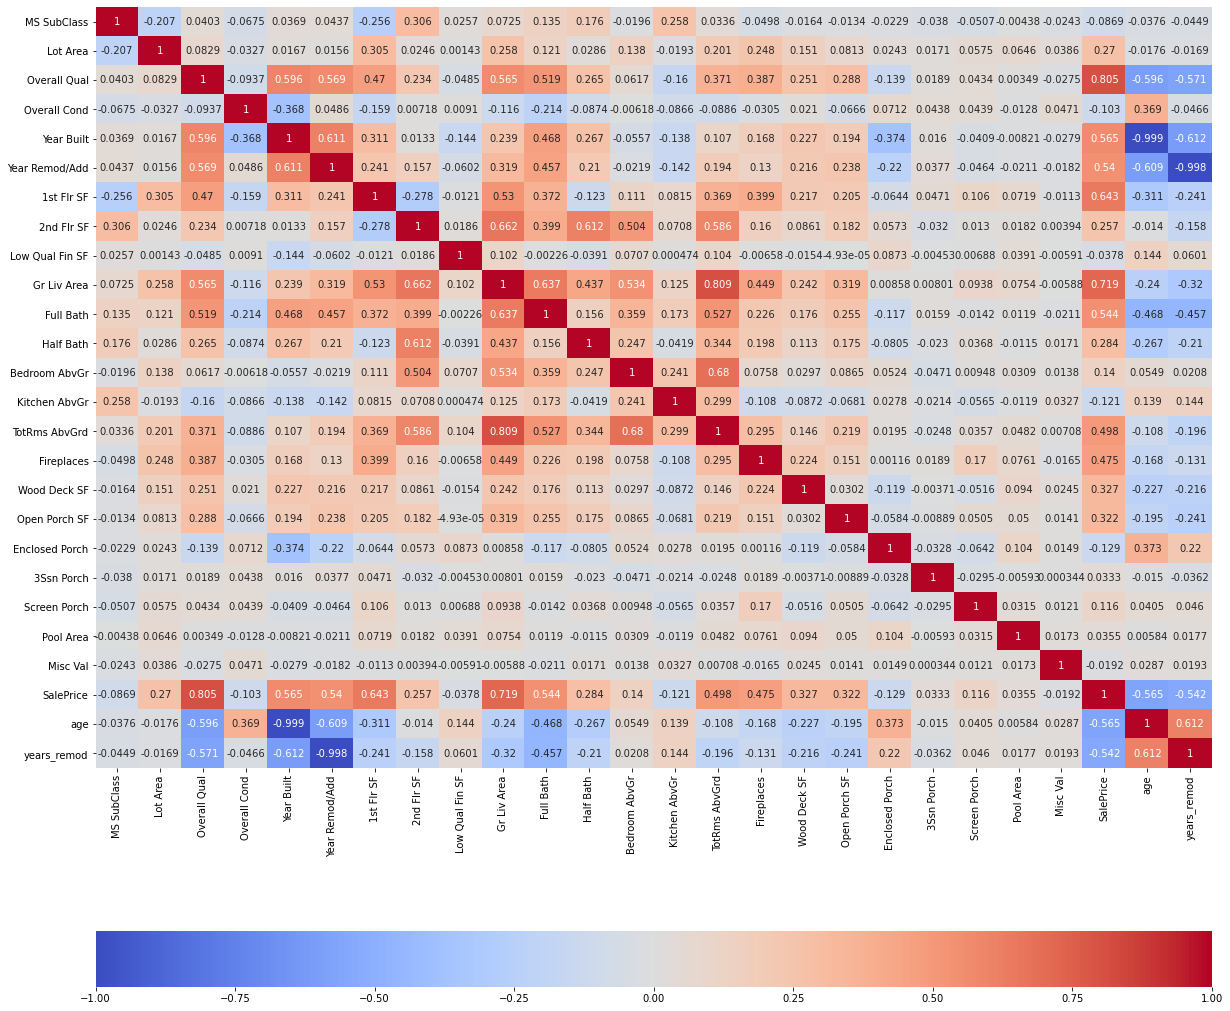

In [35]:
# Lets Plot a Correlation Matrix
numeric_df = round2_transformed_data.select_dtypes(['integer', 'float'])

plt.figure(figsize=(20,20))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.3g', vmin=-1, vmax=1, 
            center= 0, cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})

Following are the **most Correlated Features** with `SalePrice`
- `Overall quality`
- `Gr Liv Area` 
- `Exter Qual`
- `Kitchen Qual`
- `Total Bsmt SF` 
- `Garage Cars`
- `Garage Area` 
- `1st Flr SF` 
- `Years Before Sale`
- `Years Since Remod`


Within these features, there is a **high correlation present between them that could be collinearity as well**
- `Total Bsmt SF` and `1st Flr SF`
- `Overall quality`, `Exter Qual`, and `Kitchen Qual`
- `Garage Cars` and `Garage Area`

Since the columns `age` and `years_remod` were engineered from columns `Year Built` and `Year Remod/Add`, a very high correlation. though negative, can be seen among them


In [36]:
# Taking Correlation Coeffients
abs_corr_coeffs = numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False)

# Displaying head only
abs_corr_coeffs.head()

SalePrice       1.000000
Overall Qual    0.805160
Gr Liv Area     0.719345
1st Flr SF      0.642763
age             0.565314
Name: SalePrice, dtype: float64

Lets keep the columns with correlation coeffients above 0.4 

We will change it to get better results later.

In [37]:
abs_corr_coeffs[abs_corr_coeffs > 0.4]

SalePrice         1.000000
Overall Qual      0.805160
Gr Liv Area       0.719345
1st Flr SF        0.642763
age               0.565314
Year Built        0.564935
Full Bath         0.544366
years_remod       0.541941
Year Remod/Add    0.540110
TotRms AbvGrd     0.498450
Fireplaces        0.474777
Name: SalePrice, dtype: float64

In [38]:
# Drop any columns that are less correlant that 0.4.
round2_transformed_data = round2_transformed_data.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

#### Moving on to Categorical Columns 
All nominal variables are the candidates of being converted to Categorical Dtype. Let's check the nominal variables for
- Unique values in them. We have to be vary of columns that contain too many unique values
- Columns that have an overwhelming percentage of a certain value. They are akin to low-variance numerical feature (no variability in the data for model to capture). For example if a column has a few unique values but more than 95% of the values belong to a specific category.

We also have to look into columns that are currently in numerical encoding but could do much better with Categorical encoding 


In [39]:
# according to the Data Documentary, following are the nominal variables
nominal_features_all = [ 'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 
                     'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
                     'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
                     'Misc Feature', 'Sale Type', 'Sale Condition']

# We need to retrieve the columns that exist in our functioning DataFrame, i-e, round2_transformed_data
nominal_features = [] 
for name in nominal_features_all:
    if name in round2_transformed_data.columns:
        nominal_features.append(name)
nominal_features

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [40]:
# Lets check the frequency tables with value_counts
for col in nominal_features:
    print(col,'\n',round2_transformed_data[col].value_counts(), '\n', 'NUNIQUE:',
         round2_transformed_data[col].nunique(), '\n', '-'*20)

MS Zoning 
 RL         2267
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64 
 NUNIQUE: 7 
 --------------------
Street 
 Pave    2912
Grvl      12
Name: Street, dtype: int64 
 NUNIQUE: 2 
 --------------------
Land Contour 
 Lvl    2630
HLS     120
Bnk     114
Low      60
Name: Land Contour, dtype: int64 
 NUNIQUE: 4 
 --------------------
Lot Config 
 Inside     2138
Corner      507
CulDSac     180
FR2          85
FR3          14
Name: Lot Config, dtype: int64 
 NUNIQUE: 5 
 --------------------
Neighborhood 
 NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
Gilbert    165
NridgHt    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2


- Columns namely `Heating`, `Roof Matl`, `Condition 2`, `Land Contour`, `Street`, `Central Air` have one value each that has an overwhelming presence.
- Columns `Exterior 1st`, `Exterior 2nd` and `Neighborhood` contain relatively larger number of unique values.
    - We should decide among either to take them all, leave them all or define a threshold which could be modified later
        

In [41]:
# This is the frequency table showing how much the MOST FREQUENT value is occupying of the total column. 
for col in nominal_features:
    print(col, round2_transformed_data[col].value_counts(normalize = True, ascending = False)[0])

MS Zoning 0.7753077975376197
Street 0.9958960328317373
Land Contour 0.899452804377565
Lot Config 0.7311901504787962
Neighborhood 0.1515047879616963
Condition 1 0.8611491108071135
Condition 2 0.9900820793433652
Bldg Type 0.8272913816689467
House Style 0.506155950752394
Roof Style 0.7930916552667578
Roof Matl 0.9859781121751026
Exterior 1st 0.350547195622435
Exterior 2nd 0.34678522571819426
Foundation 0.44596443228454175
Heating 0.9846101231190151
Central Air 0.93296853625171


In [42]:
# Adjust an arbitrary cutoff at 0.85
myraid_cutoff = 0.85

# Because of some unusual errors, I introduced the dictionary rather than pulling out the columns directly
myraid_dict = {}
for col in nominal_features:
    myraid = round2_transformed_data[col].value_counts(normalize = True, ascending = False)[0]
    myraid_dict[col] = myraid
for key, val in myraid_dict.items():
    if val > myraid_cutoff:
        round2_transformed_data.drop(key, axis=1, inplace=True)
        nominal_features.remove(key)

In [43]:
# Adjust an arbitrary cutoff at 10
nunique_thresh = 10
nunique_dict = {}
for col in nominal_features:
    nunique_dict[col] = round2_transformed_data[col].nunique()
for key, val in nunique_dict.items():
    if val > nunique_thresh:
        round2_transformed_data.drop(key, axis=1, inplace=True)
        nominal_features.remove(key)

Lets look into the numerical variables that can possibly do better being categorical

In [44]:
for col in round2_transformed_data.select_dtypes(['integer', 'float']).columns:
    print(col, '\n', round2_transformed_data[col].value_counts(), '\n')

Overall Qual 
 5     825
6     732
7     602
8     349
4     226
9     107
3      40
10     26
2      13
1       4
Name: Overall Qual, dtype: int64 

Year Built 
 2005    142
2006    138
2007    107
2004     99
2003     88
1977     57
1920     57
1976     54
1999     52
1958     48
2000     48
2002     47
1998     47
2008     47
1968     45
1959     43
1954     43
1910     43
1978     42
1970     42
1967     41
1972     40
1993     40
1956     39
1971     39
1950     38
1960     37
1994     36
1940     36
1966     35
2001     35
1957     35
1962     35
1963     35
1997     35
1955     34
1965     34
1925     34
1961     34
1964     33
1996     33
1995     31
1900     29
1969     28
1980     27
1992     27
1948     27
1930     26
2009     25
1975     25
1953     24
1915     24
1974     23
1941     23
1973     21
1979     21
1939     20
1926     19
1990     19
1984     19
1951     18
1952     18
1949     18
1923     17
1922     16
1924     16
1945     15
1946     15
1988     15
1938     

Following Columns that are currently numerical in our round2_transformed_data's numerical Dtypes:
- Ordinal Variables:
    - `Overall Qual`
- Discrete Variables:
    - `Year Built`, `Year Remod/Add`, `Full Bath`, `TotRmsAbvGrd`, `Fireplaces`, `years_remod`, `age`
- Continuous Variables:
    - `1st Flr SF`, `Gr Liv Area`, `SalePrice`
    
So far, its difficult to see any 'plain' nominal variable in above-given columns. We can't assume Ordinal Variables as to be Nominal ones.

Let's move on for now

<font color = 'red'> how to work with ordinal variables with keeping in mind that we are going to do linear regression. Secondly, do we need to scale? if yes then how. There is a page opened in this browser. Consult it too. And lastly, there are columns that show year. what to do with them

In [45]:
# Nominal vs Ordinal vs Ratio vs Interval round2_transformed_data[col]

In [46]:
# Select just the remaining text columns and convert to categorical
text_cols = round2_transformed_data.select_dtypes(include=['object'])

for col in text_cols:
    round2_transformed_data[col] = round2_transformed_data[col].astype('category')
    
# Create dummy columns and add back to the dataframe!
dummies = pd.get_dummies(round2_transformed_data.select_dtypes(include=['category']))

# Concatenate back
round2_transformed_data = pd.concat([round2_transformed_data, dummies], axis=1)

# Drop the original ones
round2_transformed_data = round2_transformed_data.drop(text_cols, axis=1)

# Check
round2_transformed_data.shape

(2924, 88)

### Updating Our Function

In [47]:
def select_features(df, coef_cutoff, myraid_cutoff, nunique_thresh):
    '''
    The function replicates the code done in prior cells. 
    It selects the features we define to be appropriate
    
    Args:
        df: DataFrame
        coef_cutoff: Selects the minimum Coefficient of Correlation as Cut off 
        myraid_cutoff: Selects the maximum acceptable presence of the Mode value in its column
        nunique_thresh: Selects the maximum number of unique values for a column to be acceptable
        
    Return:
        DataFrame with requested changes and Dummy Variables for Categorical Variables
    '''
    abs_corr_coeffs = df.select_dtypes(['integer', 'float']).corr()['SalePrice'].abs().sort_values(ascending=False)

    coef_cutoff = coef_cutoff
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coef_cutoff].index, axis=1)

    nominal_features = df.select_dtypes(include='object').columns.tolist()
    
    myraid_cutoff = myraid_cutoff
    myraid_dict = {}
    for col in nominal_features:
        myraid = df[col].value_counts(normalize = True, ascending = False)[0]
        myraid_dict[col] = myraid
    for key, val in myraid_dict.items():
        if val > myraid_cutoff:
            df.drop(key, axis=1, inplace=True)
            nominal_features.remove(key)
            
    nunique_thresh = nunique_thresh
    nunique_dict = {}
    for col in nominal_features:
        nunique_dict[col] = df[col].nunique()
    for key, val in nunique_dict.items():
        if val > nunique_thresh:
            df.drop(key, axis=1, inplace=True)
            nominal_features.remove(key)
            
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols, axis=1)
        
    
    return df
    

In [48]:
# We updated transform_features()
round3_transformed_data = transform_features(data)

# We have updated select_features() 
round3_selected_data = select_features(round3_transformed_data, 0.4, 0.85, 10)
round3_rmse_data = train_and_test(round3_selected_data)

print(round3_rmse_data)

29742.097652564822


In [72]:
print('Our RMSE for this attempt is around {:.2f} and\nWith an impovement in RMSE of around USD {:.2f}\nThat is almost {:.1f}% improvement than the previous results'.
      format(round3_rmse_data, round2_rmse_data-round3_rmse_data, (round2_rmse_data-round3_rmse_data)/round2_rmse_data*100))

Our RMSE for this attempt is around 29742.10 and
With an impovement in RMSE of around USD 23309.86
That is almost 43.9% improvement than the previous results


Having given some effort to improve our Feature transformation and selection, let's move on to the training and testing

---

## Round 4
Now for the final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named k, that controls the type of cross-validation that occurs

In [51]:
def train_and_test(data, k=0):
    '''
    Trains and Tests the Linear Regression Model for multiple
    values of n_splits in case n_splits > 1
    
    Args:
        data: The DataFrame
        k: n_splits
    Returns:
        RMSEs on given number of n_splits
    '''
    
    # Take numerical variables and separate features and target
    numeric_df = data.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop('SalePrice')
    target = 'SalePrice'
    
    # Instantiate LinearRegression() model
    lr = linear_model.LinearRegression()
    
    # HoldOut Validation
    if k == 0:
        train = data.iloc[:1460]
        test = data.iloc[1460:]


        lr = LinearRegression()
        lr.fit(train[features], train[target])

        predictions = lr.predict(test[features])

        mse = mean_squared_error(test[target], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    # Simple Cross Validation
    elif k == 1:
        # Shuffle the rows and 
        df_shuffled = data.sample(frac=1,)    
        train = data.iloc[:1460]
        test = data.iloc[1460:]
        
        # Case 1
        lr.fit(train[features], train[target])
        predictions_1 = lr.predict(test[features])
        mse_1 = mean_squared_error(test[target], predictions_1)
        rmse_1 = np.sqrt(mse_1)
        
        # Case 2
        
        lr.fit(test[features], test[target])
        predictions_2 = lr.predict(train[features])
        mse_2 = mean_squared_error(train[target], predictions_2)
        rmse_2 = np.sqrt(mse_2)
        
        # Print
        print('Set no.1 RMSE:',rmse_1)
        print('Set no.2 RMSE:',rmse_2)
        
        # Average
        avg_rmse = np.mean([rmse_1, rmse_2])
        return avg_rmse
    
    # K-Fold Cross Validation
    else:
        
        rmses = []
        kf = KFold(n_splits=k, shuffle=True)
        mses = cross_val_score(lr, data[features], data[target], scoring = "neg_mean_squared_error", cv =kf)
        for n in mses:
            root = abs(n)**0.5
            rmses.append(root)
            
        avg_rmse = np.mean(rmses)
        
        return avg_rmse

In [56]:
# We updated transform_features()
round4_transformed_data = transform_features(data)
round4_selected_data = select_features(round4_transformed_data, 0.4, 0.85, 10)
round4_rmse_data = train_and_test(round4_selected_data,7)

for i in range(20):
    round4_rmse_data = train_and_test(round4_selected_data,7)
    
    print(i, round4_rmse_data)

0 29137.925816520055
1 28835.898012819584
2 28902.848413834934
3 28808.1042008234
4 28746.076438596578
5 28770.178037474747
6 28952.972989242237
7 28725.405903842366
8 28883.55478072658
9 28767.609955564116
10 134016819.71459027
11 28955.96254014446
12 28876.4919312005
13 28941.375767152298
14 28918.818367357504
15 28883.521323420882
16 28729.457356866762
17 28881.289278647473
18 28765.60883579671
19 28920.287811116672
